In [137]:
# import the liraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import plotly
from mpl_toolkits import mplot3d
import plotly.express as px

In [3]:
## load the data 
cars=pd.read_csv('cheki_cars_cleaned_new.csv')
cars.head()

,make,model,location,color,price_in_Ksh,year_of_manufacture,transmission,mileage_in_km,fuel,foreign_local,review_score
0,mazda,demio,Nairobi,silver,600000,2013,Automatic,135000.0,Petrol,Foreign,3.714286
1,toyota,axio,Nairobi,silver,1100000,2013,Automatic,72000.0,Petrol,Foreign,3.600000
2,mercedes-benz,cla-class,Mombasa,silver,3600000,2013,Automatic,NaN,Petrol,Foreign,3.000000
3,mercedes-benz,cla-class,Mombasa,silver,3600000,2013,Automatic,NaN,Petrol,Foreign,3.000000
4,mazda,axela,Mombasa,black,1050000,2013,Automatic,58000.0,Petrol,Foreign,3.333333


In [5]:
# look at the data types 
cars.dtypes

make                    object
model                   object
location                object
color                   object
price_in_Ksh             int64
year_of_manufacture      int64
transmission            object
mileage_in_km          float64
fuel                    object
foreign_local           object
review_score           float64
dtype: object

In [14]:
# explore missing values 
(cars.isnull().sum()/cars.shape[0])*100
## 22 percent of entries in the mileage column 

make                    0.000000
model                   0.000000
location                0.000000
color                   0.000000
price_in_Ksh            0.000000
year_of_manufacture     0.000000
transmission            0.000000
mileage_in_km          22.835756
fuel                    0.000000
foreign_local           0.000000
review_score            0.000000
dtype: float64

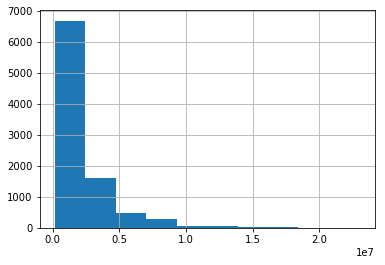

In [4]:
# distribution of price 
cars.price_in_Ksh.hist()

Text(0.5,1,'COLORS')

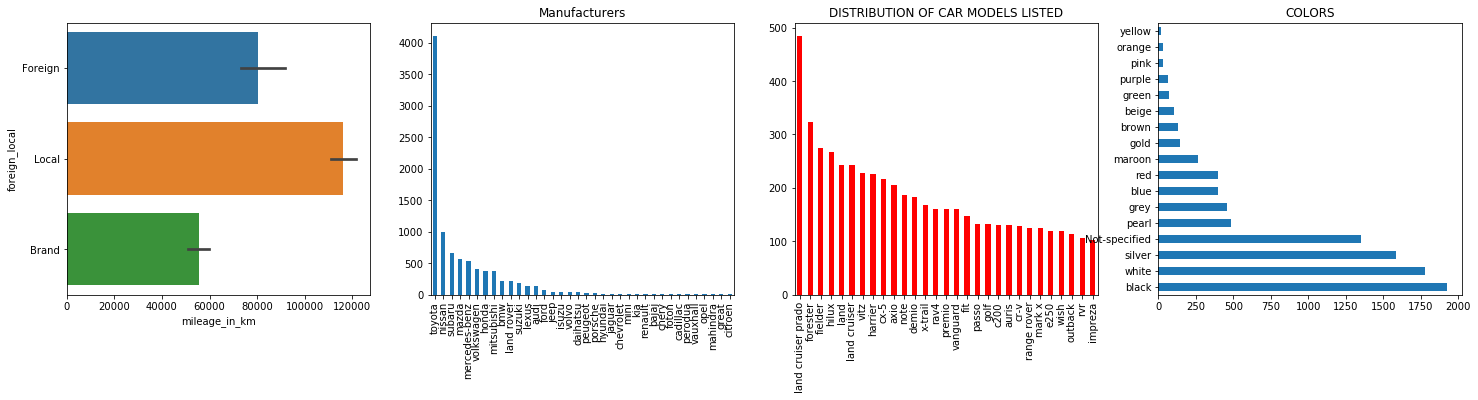

In [46]:
plt.figure(figsize=(25, 5))
plt.subplot(1,4,1)
## how mileage of cars vary in their year of manufacture 
sns.barplot(y='foreign_local',x='mileage_in_km',data=cars)

plt.subplot(1,4,2)
cars.make.value_counts().plot(kind='bar')
plt.title('Manufacturers')

plt.subplot(1,4,3)
models=cars.model.value_counts()
models[models>100].plot(kind='bar',color='red')
plt.title('DISTRIBUTION OF CAR MODELS LISTED')

plt.subplot(1,4,4)
cars.color.value_counts().plot(kind='barh')
plt.title('COLORS')

Text(0.5,1,'MOST POPULAR CAR BRANDS')

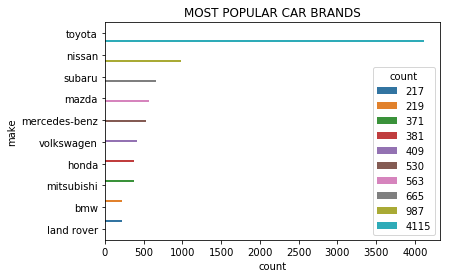

In [166]:
cars_per_brand = cars.groupby('make')['model'].count().reset_index().sort_values('model',ascending = False).head(10)
cars_per_brand = cars_per_brand.rename(columns = {'model':'count'})
sns.barplot(data=cars_per_brand, y='make', x='count', hue='count',)
plt.title('MOST POPULAR CAR BRANDS')

Text(0.5,1,'CAR COUNT BY FUEL TYPE{diesel,petrol,hybrid or any other}')

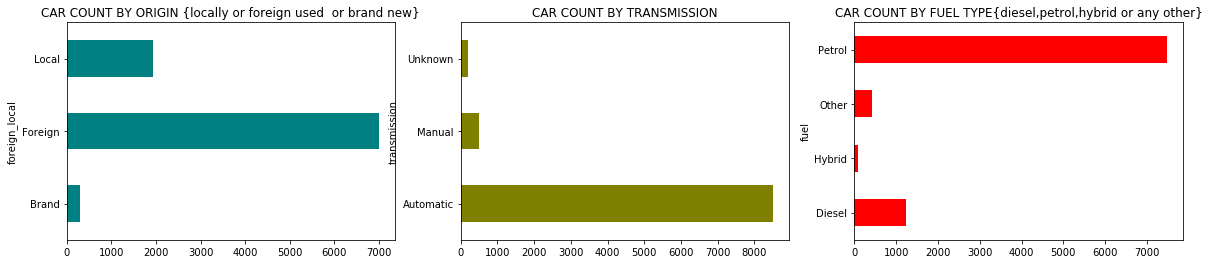

In [94]:
plt.figure(figsize=(20, 4))
plt.subplot(1,3,1)
cars.groupby('foreign_local')['make'].count().plot(kind='barh',color='TEAL')
plt.title('CAR COUNT BY ORIGIN {locally or foreign used  or brand new}')

plt.subplot(1,3,2)
cars.groupby('transmission')['make'].count().plot(kind='barh',color='OLIVE')
plt.title('CAR COUNT BY TRANSMISSION')

plt.subplot(1,3,3)
cars.groupby('fuel')['make'].count().plot(kind='barh',color='RED')
plt.title('CAR COUNT BY FUEL TYPE{diesel,petrol,hybrid or any other}')

#### Inference from the plots 
1. Cars being sold locally have a higher milleage in general 
2. Toyota is by far the major manufacturer with cars being sold in Kenya 
3. Most Japanese makers dominate the Kenyan Market 
4. Land cruiser prado is the most listed car among the Kenyan Sellers
5. Black , White and Silver are the most popular colors available among cars sold in Kenya 
6. Most cars available in kenya are automatics 
7. Petrol is the most used fuel among cars being sold in Kenya , This is  due to the fact that most used cars sold are small body cars which tend to have limited diesel options


#### create a snap of the finger eda with sweetviz

In [ ]:
report = sweetviz.analyze([cars,'cars'],target_feat='price_in_Ksh')
report.show_html('report.html')
# this gives a quick snapshot of the data 

![sweetviz of the cars data](sweetviz_price_of_cars_in_kenya.png)

[](https://github.com/okothchristopher/used_car_prices_in_Kenya_chaptr_capstone/blob/main/files/sweetviz_price_of_cars_in_kenya.png)

### features relative to price 

Text(0.5,1,'PRICE BY YEAR OF MANUFACTURE')

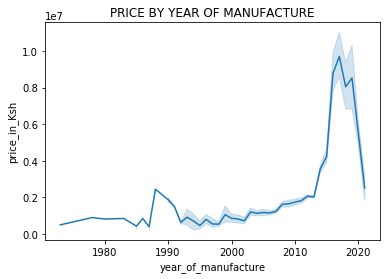

In [111]:


# how do the prices vary by year of manufacture 
sns.lineplot(x='year_of_manufacture',y='price_in_Ksh',data=cars)
plt.title('PRICE BY YEAR OF MANUFACTURE')

Text(0.5,1,'TOTAL PRICE OF VEHICLES LISTED RELATIVE TO THE TYPE OF TRANSMISSION')

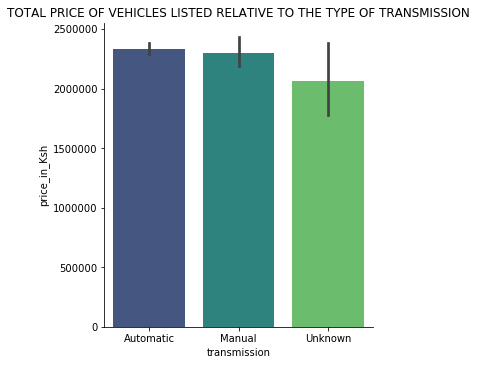

In [108]:
sns.catplot(x="transmission", y="price_in_Ksh",kind="bar", palette="viridis", data=cars)
plt.title('TOTAL PRICE OF VEHICLES LISTED RELATIVE TO THE TYPE OF TRANSMISSION')

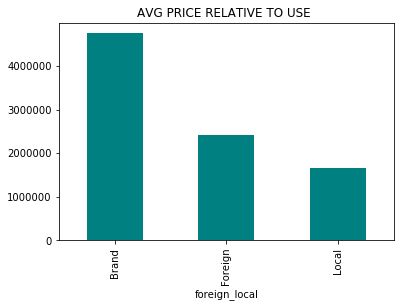

In [109]:
cars_foreign_local=cars.groupby("foreign_local")['price_in_Ksh'].mean()
cars_foreign_local.plot(kind='bar',color='teal',title='AVG PRICE RELATIVE TO USE ')


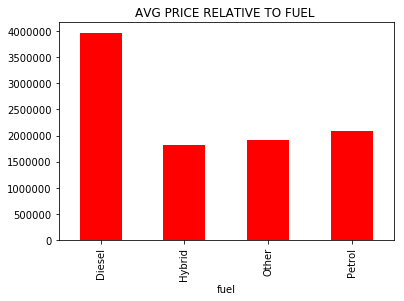

In [110]:
cars_foreign_local=cars.groupby("fuel")['price_in_Ksh'].mean()
cars_foreign_local.plot(kind='bar',color='red',title='AVG PRICE RELATIVE TO FUEL ')


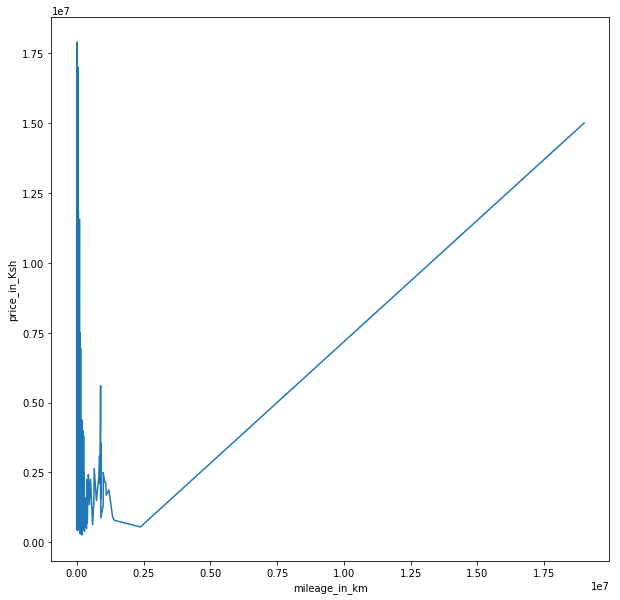

In [117]:
## mileage and price 
plt.figure(figsize=(10,10))
sns.lineplot(x='mileage_in_km',y='price_in_Ksh',data=cars)

## inference on price relationships 
1. Brand New cars have a higher average price compared to used cars either locally or abroad 
2. Cars do not vary in price due to transmission 
3. Diesel cars o average have higher price tags- they are mostly suvs and trucks which naturally have a higher price compared to sedans 
4. Cars manufactured before 2008 have a relatively lower price and cars manufactured between the periods 2010-2020 are relatively high in price 

### PRICE CORRELATIONS 

In [122]:
cars_numeric=cars.select_dtypes(include=np.number)
cars_numeric.head()

,price_in_Ksh,year_of_manufacture,mileage_in_km,review_score
0,600000,2013,135000.0,3.714286
1,1100000,2013,72000.0,3.600000
2,3600000,2013,NaN,3.000000
3,3600000,2013,NaN,3.000000
4,1050000,2013,58000.0,3.333333


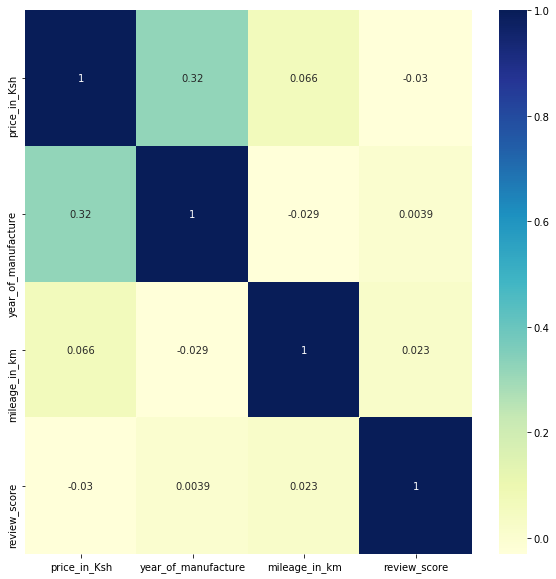

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(cars_numeric.corr(),annot=True,cmap='YlGnBu')

## CORRELATION INFERENCE 
1. None of the variables under study for price have a significang correlation with price 

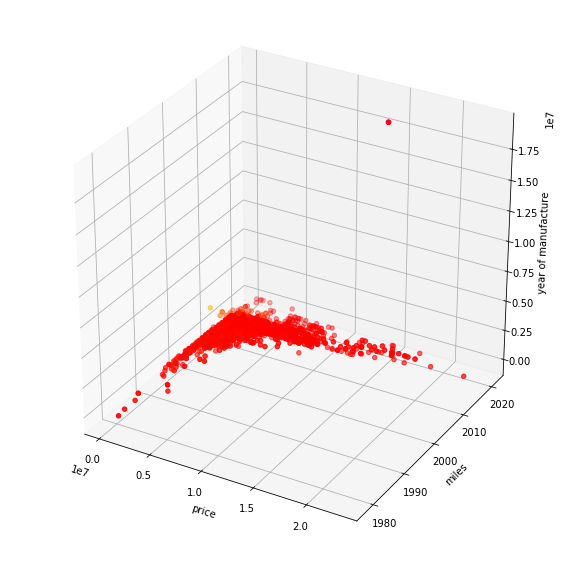

In [136]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

x_points = cars.price_in_Ksh
z_points = cars.mileage_in_km
y_points = cars.year_of_manufacture
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('price')
ax.set_ylabel('miles')
ax.set_zlabel('year of manufacture')

plt.show()

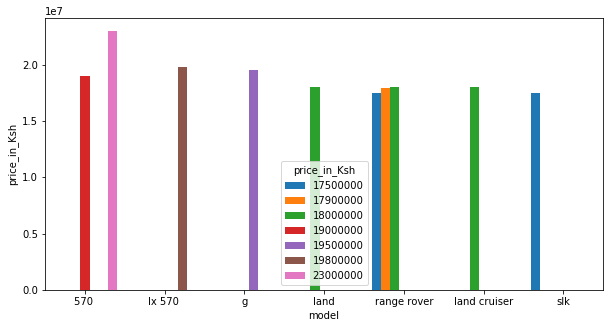

In [172]:
plt.figure(figsize=(10,5))
# most expensive cars 
expensive_cars = cars.sort_values('price_in_Ksh',ascending = False).head(10)
sns.barplot(data=expensive_cars, x='model', y='price_in_Ksh', hue='price_in_Ksh',saturation=4)


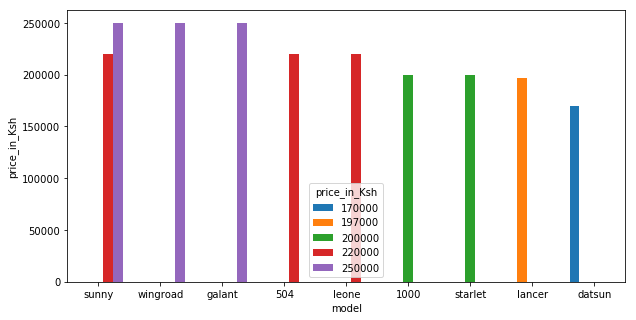

In [173]:
# least expensive cars 
plt.figure(figsize=(10,5))
least_expensive_cars = cars.sort_values('price_in_Ksh',ascending = False).tail(10)
sns.barplot(data=least_expensive_cars, x='model', y='price_in_Ksh', hue='price_in_Ksh',saturation=4)